*1004 파이썬 머신러닝 완벽 가이드 p.181~p.210*

# **CHAPTER 04. 분류**

- 지도학습: 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식

- 지도학습의 대표적인 유형인 분류(Classification)는 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것

- 즉, 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는
것.



---

<다양한 머신러닝 알고리즘으로 구현되는 분류>

1. 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)

2. 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)

3. 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)

4. 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)

5. 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘

6. 심층 연결 기반의 신경망(Neural Network)

7. 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)



---


앙상블은 일반적으로는 배깅(Bagging)과 부스팅(Boosting) 방식으로 나뉘며, 배깅 방식의 대표인 랜덤 포레스트(Random
Forest)는 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용하는 알고리즘임.

---

**02. 결정 트리**

결정 트리(Decision Tree)는 데이터에
있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만듦.

-

규칙 노드(Decision Node): 규칙 조건

리프 노드(Leaf Node): 결정된 클래스 값

-트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음(과적합)

---

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦. 즉, 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측함.

=> 이러한 정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 **정보 이득(Information Gain)**
지수와 **지니 계수**가 있음.

**1.정보 이득**

: 엔트로피라는 개념을 기반으로 함. 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값
이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮습니다. 정보 이득 지수는 1에서 엔트로피 지수를
뺀 값(1 - 엔트로피 지수).

결정 트리는 정보 이득이 높은 속성을 기준으로 분할합니다.

**2.지니 계수**

: 0이 가장 평등하고 1로 갈수록 불평등. 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할함.

-

결정 트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터 세트를 분할함.

결정 트리의 일반적인 알고리즘은 데이터 세트를 분할하는 데 가장 좋은 조건, 즉 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정함.



---


**결정 트리 모델의 특징**

장점: 정보의 ‘균일도’라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적. 정보의 균일도만 신경 쓰면 되므로 특별한
경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음.

단점: 과적합으로 정확도가 떨어진다는 점.

->트리의 크기를 사전에 제한하는 것이 오히려 성능튜닝에 더 도움이 됨.



---

**결정 트리 파라미터**

사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier와 DecisionTreeRegressor 클래스
를 제공

DecisionTreeClassifier는 분류를 위한 클래스이며, DecisionTreeRegressor는 회귀
를 위한 클래스임. 다음과 같이 동일한 파라미터를 사용.

**1. min samples split**

- 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용
- 디폴트는 2이고 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가

**2. min_samples_leaf**

- 분할이 될 경우 왼쪽과 오른쪽의 브랜치 노드에서 가져야 할 최소한의 샘플 데이터 수
- 큰 값으로 설정될수록, 분할될 경우 왼쪽과 오른쪽의 브랜치 노드에서 가져야 할 최소한의 샘플 데이터 수 조건을 만족시키기가 어려우므로 노드 분할을 상대적으로 덜 수행함
- min_samples_split와 유사하게 과적합 제어 용도. 그러나 비대칭적(imbalanced) 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요.

**3. max features**

- 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행.
- int 형으로 지정하면 대상 피처의 개수, float 형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임
- 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수), 즉 7 전체 피처 개수 만큼 선정
- ‘auto’로 지정하면 sqrt와 동일
- ‘log’는 전체 피처 중 Iog2(전체 피처 개수) 선정
- ‘None’은 전체 피처 선정


**4. max_depth**

-  트리의 최대 깊이를 규정.
- 디폴트는 None. None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속
깊이를 증가시킴.
- 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요.

**5. max_leaf_nodes**

- 말단 노드(Leaf)의 최대 개수



---

**결정 트리 모델의 시각화**

<사이킷런은 Graphviz 패키지와 쉽게 인터페이스할 수 있도록
export_graphviz() API를 제공>

함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화함.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)
# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)
# DecisionTreeClassifer 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [4]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)

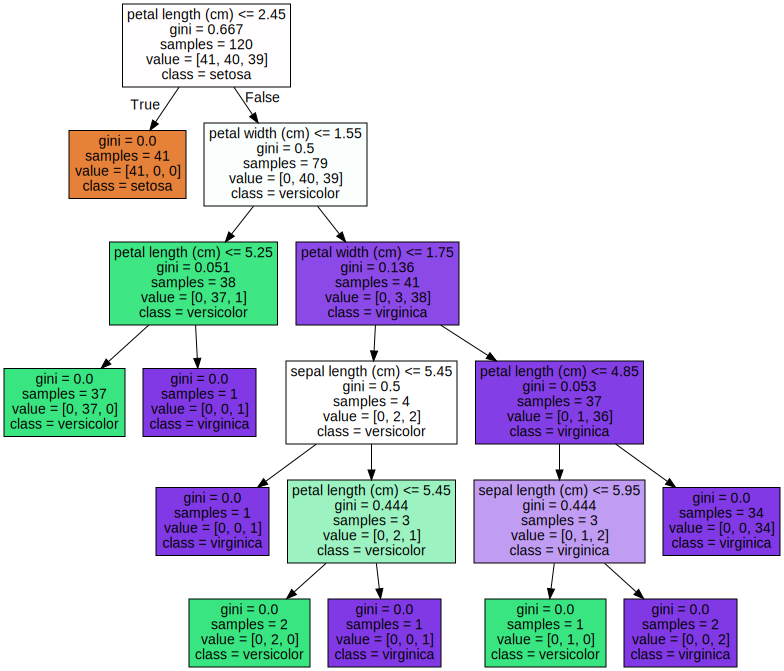

In [6]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 리프 노드: 더 이상 자식 노드가 없는 노드. 리프 노드는 최종 클래스(레이블) 값이 결정되는 노드. 리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 됨.

- 브랜치 노드: 자식 노드가 있는 노드. 자식 노드를 만들기 위한 분할 규칙 조건을 가지고 있음.

-

위 그림에서 노드 내에 기술된 지표의 의미

1.petal length(cm)〈= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건. 이 조건이 없으면 리프 노드다.

2.gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수

3.samples는 현 규칙에 해당하는 데이터 건수

4.value = []는 클래스 값 기반의 데이터 건수. 붓꽃 데이터 세트는 클래스 값으로 0, 1. 2를 가지고 있으며, 0: Setosa, 1: Versicolor, 2: Virginica 품종을 가리킴. 만일 Value = [41,40,39]라면 클래스 값의 순서로 Setosa 41개, Versicolor 40개, Virginica 39개로 데이터가 구성돼 있다는 의미.

-

<1번 노드>

전체 데이터가 120개 / Setosa 41개, Versicolor 40개, Virginica 39개로 데이터 구성 /  sample 120개가 value = [41, 40,39] 분포도로 되어 있으므로 지니 계수는 0.667 / petal length (cm)〈= 2.45 규칙으로 자식 노드 생성 / class 三 setosa는 하위 노드를 가질 경우에 setosa의 개수가 41 개로 제일 많다는 의미

*petal length (cm)〈=2.45 규칙이 True 또는 False로 분기하게 되면 2번, 3번 노드가 만들어짐.

-

<2번 노드>

41 개의 샘플 데이터 모두 Setosa이=예측 클래스는 Setosa로 결정 / 지니계수는 0.

*모든 데이터가 Setosa로 결정되므로 클래스가 결정된 리프 노드가 되고 더 이상 2번 노드에서 규칙을 만들 필요가 없음.

-

<3번 노드>

79개의 샘플 데이터 중 Versicolor 40개, Virginica 39개로 여전히 지니 계수는 0.5로 높음. 따라서 다음 자식 브랜치 노드로 분기할 규칙 필요 /  petal width (cm)〈= 1.55 규칙으로 자식 노드 생성.

*Petal length (cm)〈= 2.45가 False인 규칙 노드

-

<4번 노드>

38개의 샘플 데이터 중 Versicolor 37개, Virginica가 1개로 대부분이 versicolor임. /  지니 계수는 0.051로 매우 낮으나 여전히 Versicolor와 Virginica가 혼재돼 있으므로 petal length(cm)〈= 5.25라는 새
로운 규칙으로 다시 자식 노드 생성

*Petal width (cm)〈= 1.55가 True인 규칙 노드

-

<5번 노드>

41개의 샘플 데이터 중 Versicolor 3개, Virginica가 38개로 대부분이 virginica임 / 지니 계수는 0.136으로 낮으나 여전히 Versicolor와 Virginica가 혼재되어 있으므로 petal width(cm) <= 1.75라는 새로운
규칙으로 다시 자식 노드 생성

*Petal width (cm)〈= 1.55가 False인 규칙 노드

---

각 노드의 색깔: 붓꽃 데이터의 레이블 값. 주황색은 0: Setosa, 초록색은 1: Versicolor, 보라색은 2: Virginica 레이블을 나타냅니다. 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많음.

---

규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속해서 만듦. 이로 인해 결국 매우 복잡한 규칙 트리가 만들어져 모델이 쉽게 과적합되는 문제점을 가지게 됨.

- **max_depth**는 결정 트리의 최대 트리 깊이를 제어함. max_depth를 제한 없음에서 3개로 설정하면 트리 깊이가 설정된 max_depth에 따라 줄어들면서 더 간단한 결정 트리가 됨.

- **min_samples_splits**는 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수.\
 예시) min_samples_splits=4, 즉 자식 노드로 분할하려면 최소한 샘플 개수가 4개는 필요한데, 3개밖에 없으므로 더 이상 자식 규칙 노드를 위한 분할을 하지 않고 리프 노드가 됨. 자연스럽게 트리 깊이도 줄었고 더욱 더 간결한 결정
트리가 만들어짐.

- **min_samples_leaf**는 분할될 경우 왼쪽과 오른쪽 자식 노드 각각이 가지게 될 최소 데이터 건수를 지정함. 어떤 노드가 분할할 경우, 왼쪽과 오른쪽 자식 노드 중에 하나라도 min_samples_leaf로 지정된 최소 데이터 건수보다 더 작은 샘플
데이터 건수를 갖게 된다면, 해당 노드는 더 이상 분할하지 않고 리프 노드가 됨.\
min_samples_leaf의 값을 키우면 분할될 때 자식 노드들 모두가 해당 조건을 만족하기에 어려운 조건이 됨. 따라서 min_samples_leaf의 값을 키우게 되면 더 이상 분할되지 않고 리프 노드가 될 수 있는 가능성이 높아짐.



---

사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 feature_importances_ 속성
으로 제공함.

**feature_importances_**: ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당됨. 일반적으로 값이 높을수록 해당 피처의 중요도가 높음.

Feature Importance:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

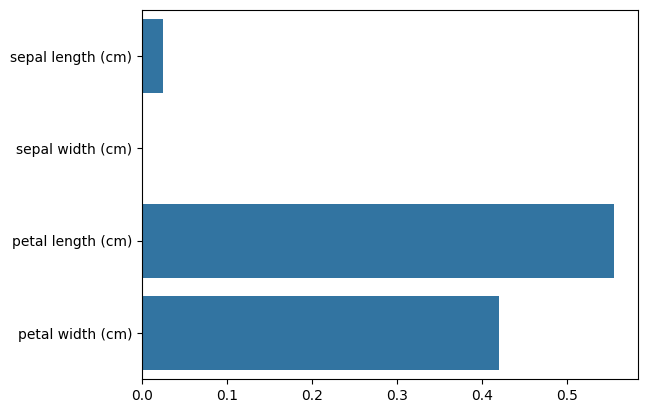

In [7]:
## 붓꽃 데이터 세트에서 피처별로 결정 트리 알고리즘에서 중요도를 추출하고, 막대그래프로 표현

import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature Importance:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

---

**결정 트리 과적합**

결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지와 이로 인한 과적합 문제를 시각화하기

<사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 make_classification() 함수를 제공>

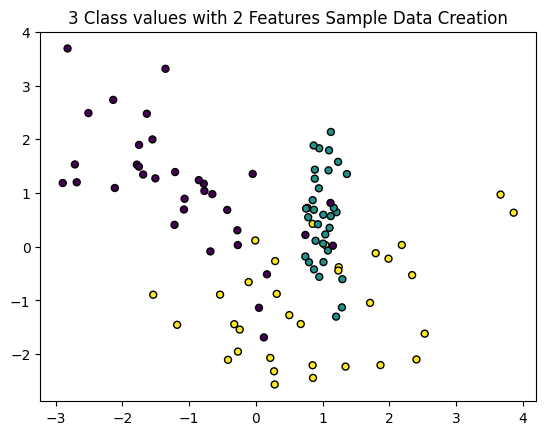

In [8]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample Data Creation')

# 2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

*각 피처가 X, Y축으로 나열된 2차원 그래프이며, 3개의 클래스 값 구분은 색깔로 돼 있음.

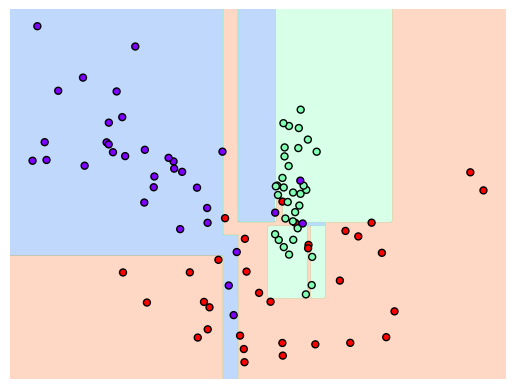

In [11]:
## 결정 트리 생성에 별다른 제약이 없도록 하이퍼 파라미터가 디폴트인 Classifier를 학습하고 결정 기준 경계를 시각화

from sklearn.tree import DecisionTreeClassifier

# Classifier의 Decision Boundary를 시각화 하는 함수 정의
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

*이렇게 복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어지게 됨 (과적합)

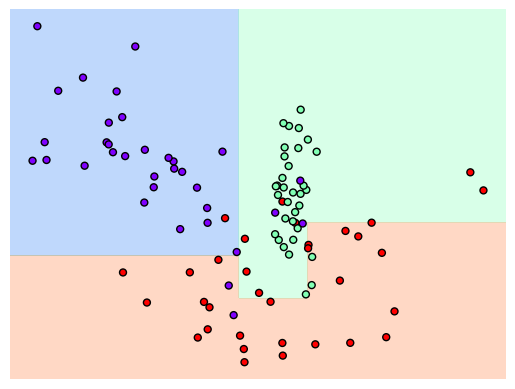

In [12]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

*이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됐음을 알 수 있음.
*학습 데이터에만 지나치게 최적화된 분류 기준은 오히려 테스트 데이터 세트에서 정확도를 떨어뜨릴 수 있음.



---

**결정 트리 실습 - 사용자 행동 인식 데이터 세트**

30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처를
수집한 데이터. 수집된 피처 세트를 기반으로 결정 트리를 이용해 어떠한 동작인지 예측하기

In [14]:
import pandas as pd
import matplotlib.pyplot as pit
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
from google.colab import files
uploaded = files.upload()

feature_name_df = pd.read_csv('features.txt', sep='\s+',header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

Saving features.txt to features.txt
전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


*피처명을 보면 인체의 움직임과 관련된 속성의 평균/표준편차가 X, Y, Z축 값으로 돼 있음을 유추할 수 있음

In [15]:
## 중복된 피처명이 얼마나 있는지 알아보기

feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


*총 42개의 피처명이 중복됨

In [16]:
## 중복된 피처명에 대해서는 원본 피처명에 _1또는 _2를 추가로 부여
## 새로운 피처명을 가지는 DataFrame을 반환하는 함수인 get_new_feature_name_df()를 생성

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [32]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
uploaded = files.upload()

def get_human_dataset():

    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('features.txt', sep='\s+',
                                  header = None, names = ['column_index', 'column_name'])

    # 중복된 피처명으 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('X_train.txt', sep = '\s+', names=feature_name)
    X_test = pd.read_csv('X_test.txt', sep = '\s+', names=feature_name)

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    y_train = pd.read_csv('y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('y_test.txt', sep='\s+', header=None, names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving X_test.txt to X_test.txt
Saving X_train.txt to X_train.txt
Saving y_test.txt to y_test.txt
Saving y_train.txt to y_train.txt


In [35]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [36]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [38]:
## 사이킷런의 DecisionTreeClassifier를 이용해 동작 예측 분류를 수행

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


=>약 85.48%의 정확도를 나타내고 있음.

In [40]:
## 결정 트리의 트리 깊이(Tree Depth)가 예측 정확도에 주는 영향을 살펴보기
## GridSearchCV를 이용해 사이킷런 결정 트리의 깊이를 조절할 수 있는 하이퍼 파라미터인 max_depth 값을 변화시키면서 예측 성능 확인

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [ 6, 8 ,10, 12, 16 ,20, 24],
    'min_samples_split': [16]
}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


=>max_depth가 8일 때 5개의 폴드 세트의 최고 평균 정확도 결과가 약 85.49%로 도출

In [41]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성 .
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


=>mean_test_score는 max_depth가 8일 때 0.854로 정확도가 정점이고, 이를 넘이가면서 정확도가 계속 떨어짐.\
=>깊어진 트리는 학습 데이터 세트에는 올바른 예측 결과를 가져올지 모르지만, 검증 데이터 세트에서는 오히려 과적합으로 인한 성능 저하를 유발

In [42]:
## 별도의 테스트 데이터 세트에서 min_samples_split은 16으로 고정하고 max_depth의 변화에 따른 값을 측정

max_depths = [ 6, 8, 10, 12, 16, 20, 24]

# max.depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


=>max_depth가 8일 경우 약 87.17%로 가장 높은 정확도를 나타냄.

In [43]:
## max_depth와 min_samples_split을 같이 변경하면서 정확도 성능을 튜닝

params = {
    'max_depth': [ 8, 12, 16, 20],
    'min_samples_split': [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


max_depth가 8, min_samples_split이 16일 때 가장 최고의 정확도로 약 85.49%를 나타냄

In [44]:
## 별도 분리된 테스트 데이터 세트에 해당 하이퍼 파라미터를 적용
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


=>max_depth 8, min_samples_split 16일 때 테스트 데이터 세트의 예측 정확도는 약 87.17%

<function matplotlib.pyplot.show(close=None, block=None)>

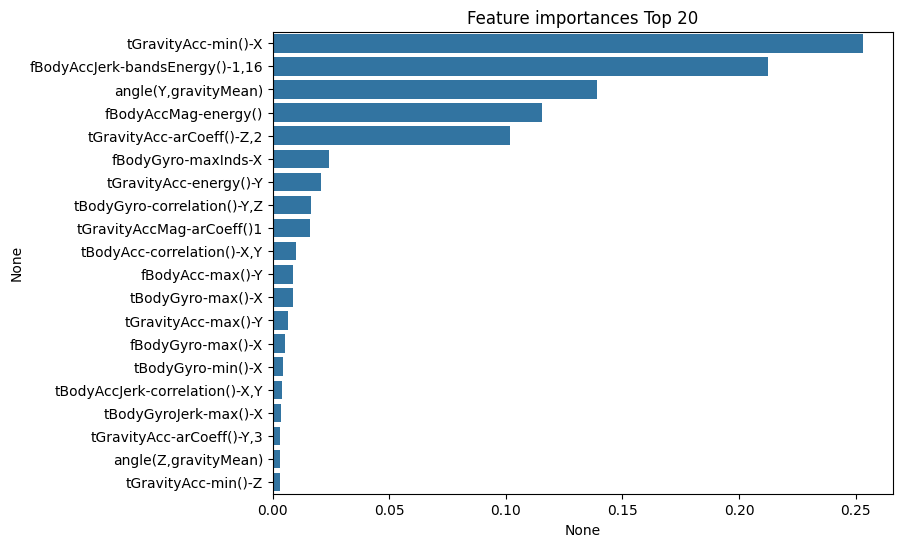

In [45]:
## 결정 트리에서 각 피처의 중요도를 feature_importances_ 속성을 이용해 알아보기
## 중요도가 높은 순으로 Top 20 피처를 막대그래프로 표현

import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show

=>이 중 가장 높은 중요도를 가진 Top 5의 피처들이 매우 중요하게 규칙
생성에 영향을 미치고 있는 것을 알 수 있음.